In [1]:
import pandas as pd
import numpy as np
#from google.colab import files
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder

Data Sources - 
Small Dataset - https://www.kaggle.com/tmdb/tmdb-movie-metadata#tmdb_5000_movies.csv

Full Dataset - https://www.kaggle.com/rounakbanik/the-movies-dataset

Other potential datasets -

https://grouplens.org/datasets/movielens/latest/

https://www.kaggle.com/stephanerappeneau/350-000-movies-from-themoviedborg#MostCommonLanguageByDirector.csv

https://www.kaggle.com/ritayandhara/tmdb-dataset

https://www.kaggle.com/danielgrijalvas/movies

In [2]:
#uploaded = files.upload()

In [3]:
#uploaded = files.upload()

For this section, use these datasets:
https://www.kaggle.com/tmdb/tmdb-movie-metadata#tmdb_5000_movies.csv

This is all optional, can comment this code out as well

In [4]:
#small_credits = pd.read_csv(io.BytesIO(uploaded['tmdb_5000_credits.csv']))

small_credits = pd.read_csv('tmdb-movie-metadata/tmdb_5000_credits.csv')
small_credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
#uploaded = files.upload()

In [6]:
#small_movies = pd.read_csv(io.BytesIO(uploaded['tmdb_5000_movies.csv']))
small_movies = pd.read_csv('tmdb-movie-metadata/tmdb_5000_movies.csv')
small_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [7]:
small_credits.columns = ['id','tittle','cast','crew']
small_movies = small_movies.merge(small_credits, on='id')
small_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [8]:
small_movies.drop(['tittle'], axis=1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_.

Text(0.5, 1.0, 'Highest Earners')

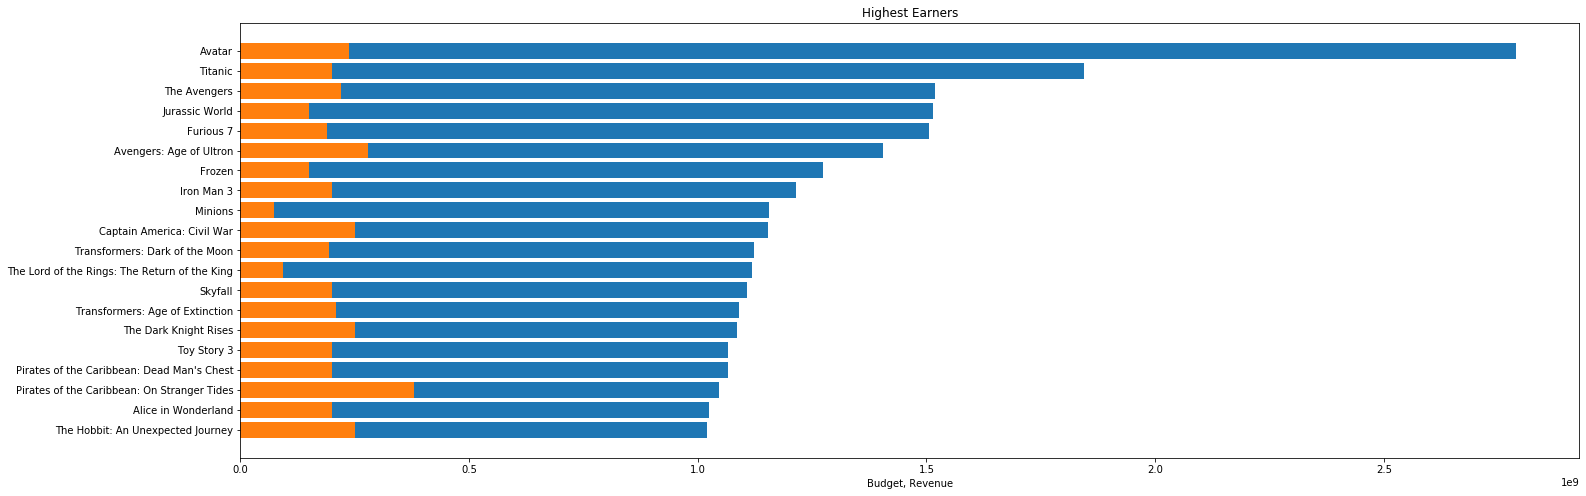

In [9]:
top_rev = small_movies.sort_values('revenue', ascending = False)
plt.figure(figsize=(24,8))

plt.barh(top_rev['title'].head(20), top_rev['revenue'].head(20), align = 'center')
plt.barh(top_rev['title'].head(20), top_rev['budget'].head(20), align = 'center')
plt.gca().invert_yaxis()
plt.xlabel("Budget, Revenue")
plt.title("Highest Earners")

In [10]:
def ratio(x):
  rev = x['revenue']
  bud = x['budget']
  if (bud==0):
    bud = 1
  return rev/bud


In [11]:
movies = small_movies.copy()
movies['ratio'] = movies.apply(ratio, axis = 1)

Text(0.5, 1.0, 'Revenue to Budget Ratio')

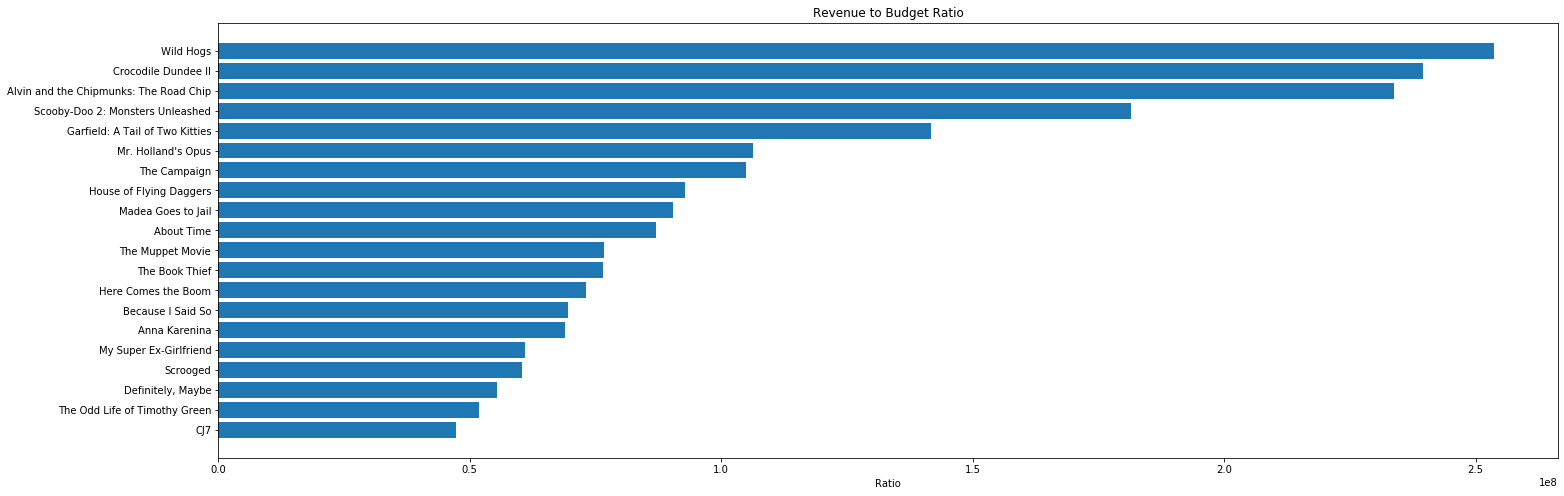

In [12]:
ratio = movies.sort_values('ratio', ascending = False)
plt.figure(figsize=(24,8))

plt.barh(ratio['title'].head(20), ratio['ratio'].head(20), align = 'center')
plt.gca().invert_yaxis()
plt.xlabel("Ratio")
plt.title("Revenue to Budget Ratio")

This is the main dataset section, which uses the metadata dataset found at:
https://www.kaggle.com/rounakbanik/the-movies-dataset

In [13]:
#metadata = pd.read_csv(io.BytesIO(uploaded['movies_metadata.csv']))
metadata = pd.read_csv('the-movies-dataset/movies_metadata.csv')
metadata.head()

C:\Users\Blakes Omen\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [14]:
metadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [15]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [16]:
metadata['popularity'] = pd.to_numeric(metadata['popularity'], errors = 'coerce')
metadata['popularity'] = metadata['popularity'].replace(0, np.nan)

metadata['budget'] = pd.to_numeric(metadata['budget'], errors = 'coerce')
metadata['budget'] = metadata['budget'].replace(0, np.nan)

metadata['revenue'] = metadata['revenue'].replace(0, np.nan)

metadata['release_date'] = pd.to_datetime(metadata['release_date'], errors= 'coerce')
metadata['year'] = metadata['release_date'].apply(lambda x: x.year if x != np.nan else np.nan)
metadata = metadata[metadata['year'] < 2016]
metadata['month'] = metadata['release_date'].apply(lambda x: x.month if x != np.nan else np.nan)
metadata['day'] = metadata['release_date'].apply(lambda x: x.day if x != np.nan else np.nan)
metadata['day_name'] = metadata['release_date'].apply(lambda x: x.day_name() if x != np.nan else np.nan)


metadata['runtime'] = metadata['runtime'].astype('float')
metadata['vote_average'] = metadata['vote_average'].astype('float')
metadata['vote_count'] = metadata['vote_count'].astype('float')


In [17]:
metadata.drop(['release_date'], axis=1, inplace = True)
metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,status,tagline,title,video,vote_average,vote_count,year,month,day,day_name
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Released,NaN,Toy Story,False,7.7,5415.0,1995.0,10,30,Monday
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995.0,12,15,Friday
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995.0,12,22,Friday
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995.0,12,22,Friday
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",NaN,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995.0,2,10,Friday


In [18]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43234 entries, 0 to 45464
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  43234 non-null  object 
 1   belongs_to_collection  4338 non-null   object 
 2   budget                 8393 non-null   float64
 3   genres                 43234 non-null  object 
 4   homepage               6930 non-null   object 
 5   id                     43234 non-null  object 
 6   imdb_id                43222 non-null  object 
 7   original_language      43225 non-null  object 
 8   original_title         43234 non-null  object 
 9   overview               42331 non-null  object 
 10  popularity             43194 non-null  float64
 11  poster_path            42905 non-null  object 
 12  production_companies   43234 non-null  object 
 13  production_countries   43234 non-null  object 
 14  revenue                7010 non-null   float64
 15  ru

In [19]:
missing_metadata = metadata.isnull().sum(axis=0).reset_index()
missing_metadata.columns = ['column_name', 'missing_count']
missing_metadata['filling_factor'] = (metadata.shape[0] - missing_metadata['missing_count']) / metadata.shape[0] * 100
missing_metadata.sort_values('filling_factor').reset_index(drop = True)

,column_name,missing_count,filling_factor
0,belongs_to_collection,38896,10.033770
1,homepage,36304,16.029051
2,revenue,36224,16.214091
3,budget,34841,19.412962
4,tagline,23743,45.082574
5,overview,903,97.911366
6,poster_path,329,99.239025
7,runtime,230,99.468011
8,status,80,99.814960
9,popularity,40,99.907480


In [20]:
metadata.drop(metadata[metadata['revenue'].isnull()].index, inplace = True)

metadata = metadata.reset_index(drop = True)

In [21]:
metadata.drop(['adult'], axis = 1, inplace = True)

In [22]:
metadata.drop(metadata[metadata['title'].isnull()].index, inplace = True)
metadata = metadata.reset_index(drop = True)

In [23]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7010 entries, 0 to 7009
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  1420 non-null   object 
 1   budget                 5075 non-null   float64
 2   genres                 7010 non-null   object 
 3   homepage               2111 non-null   object 
 4   id                     7010 non-null   object 
 5   imdb_id                7010 non-null   object 
 6   original_language      7010 non-null   object 
 7   original_title         7010 non-null   object 
 8   overview               6988 non-null   object 
 9   popularity             7010 non-null   float64
 10  poster_path            7009 non-null   object 
 11  production_companies   7010 non-null   object 
 12  production_countries   7010 non-null   object 
 13  revenue                7010 non-null   float64
 14  runtime                7004 non-null   float64
 15  spok

In [24]:
metadata.drop(metadata[metadata['budget'].isnull()].index, inplace = True)
metadata = metadata.reset_index(drop = True)

In [25]:
metadata = pd.concat([metadata,pd.get_dummies(metadata['day'], prefix='day')], axis=1).drop(['day'],axis=1)
metadata = pd.concat([metadata,pd.get_dummies(metadata['month'], prefix='month')], axis=1).drop(['month'],axis=1)
metadata = pd.concat([metadata,pd.get_dummies(metadata['day_name'], prefix='day_name')], axis=1).drop(['day_name'],axis=1)

In [26]:
#metadata.info()

In [27]:
#credits = pd.read_csv('the-movies-dataset/credits.csv')
#credits.head()

In [28]:
#credits.info()

In [29]:
#metadata['id'] = pd.to_numeric(metadata['id'], errors = 'coerce')
#credits.columns = ['cast','crew','id']
#metadata = metadata.merge(credits, on='id')
#metadata.head()

In [30]:
def extract_genres(x):
    genres = x['genres']
    item2 = eval(genres)
    return [d['name'] for d in item2]
        

In [31]:
metadata['genres'] = metadata.apply(extract_genres, axis = 1)

mlb = MultiLabelBinarizer()
metadata = metadata.join(pd.DataFrame(mlb.fit_transform(metadata['genres']), columns = mlb.classes_, index = metadata['genres'].index))

#metadata = metadata.join(pd.DataFrame(metadata['genres'].tolist()).stack().str.get_dummies().sum(level=0))
metadata = metadata.drop('genres', axis = 1)
metadata.head()

,belongs_to_collection,budget,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,0,0,0,0,0,0,0,0,0,0
1,NaN,65000000.0,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,0,0,0,0,0,0,0,0,0,0
2,NaN,16000000.0,NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,...,0,0,0,0,1,0,0,0,0,0
3,NaN,60000000.0,NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,/zMyfPUelumio3tiDKPffaUpsQTD.jpg,...,0,0,0,0,0,0,0,1,0,0
4,NaN,35000000.0,NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,5.231580,/eoWvKD60lT95Ss1MYNgVExpo5iU.jpg,...,0,0,0,0,0,0,0,1,0,0


In [32]:
metadata = metadata.drop('belongs_to_collection', axis = 1)
metadata = metadata.drop('homepage', axis = 1)
metadata = metadata.drop('imdb_id', axis = 1)
metadata = metadata.drop('original_title', axis = 1)
metadata = metadata.drop('poster_path', axis = 1)
metadata = metadata.drop('video', axis = 1)
metadata = metadata.drop('status', axis = 1)
metadata = metadata.drop('tagline', axis = 1)
metadata = metadata.drop('id', axis = 1)
metadata = metadata.drop('original_language', axis = 1)
metadata = metadata.drop('spoken_languages', axis = 1)
metadata = metadata.drop('production_companies', axis = 1)
metadata = metadata.drop('production_countries', axis = 1)
metadata = metadata.drop('overview', axis = 1)

In [33]:
metadata = metadata[metadata['Foreign'] == 0]
metadata = metadata.reset_index(drop = True)
metadata = metadata.drop('Foreign', axis = 1)

In [34]:
metadata.head()

,budget,popularity,revenue,runtime,title,vote_average,vote_count,year,day_1,day_2,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,30000000.0,21.946943,373554033.0,81.0,Toy Story,7.7,5415.0,1995.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,65000000.0,17.015539,262797249.0,104.0,Jumanji,6.9,2413.0,1995.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16000000.0,3.859495,81452156.0,127.0,Waiting to Exhale,6.1,34.0,1995.0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,60000000.0,17.924927,187436818.0,170.0,Heat,7.7,1886.0,1995.0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,35000000.0,5.231580,64350171.0,106.0,Sudden Death,5.5,174.0,1995.0,0,0,...,0,0,0,0,0,0,0,1,0,0


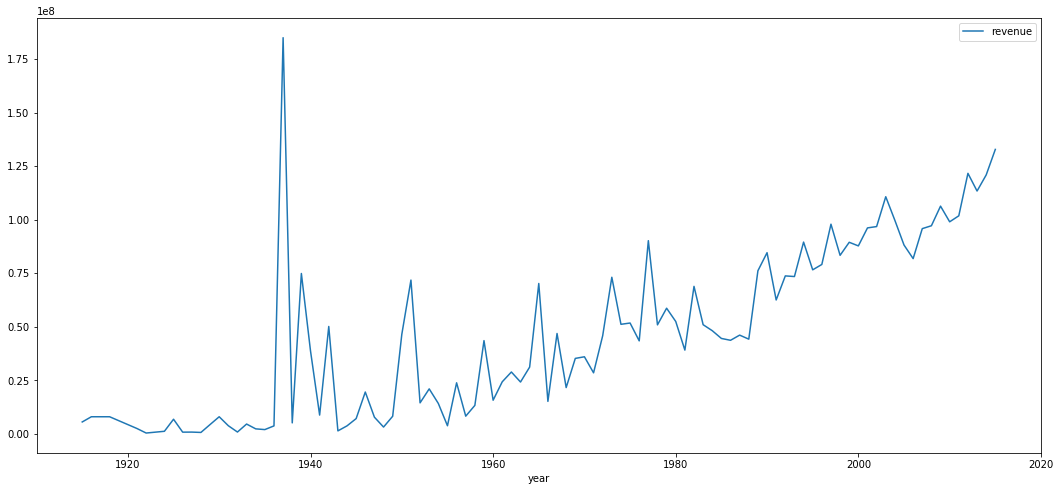

In [35]:
year_rev = (metadata[metadata['revenue'].notnull()][['year','revenue']].groupby('year').mean())
year_rev.plot(figsize=(18,8))

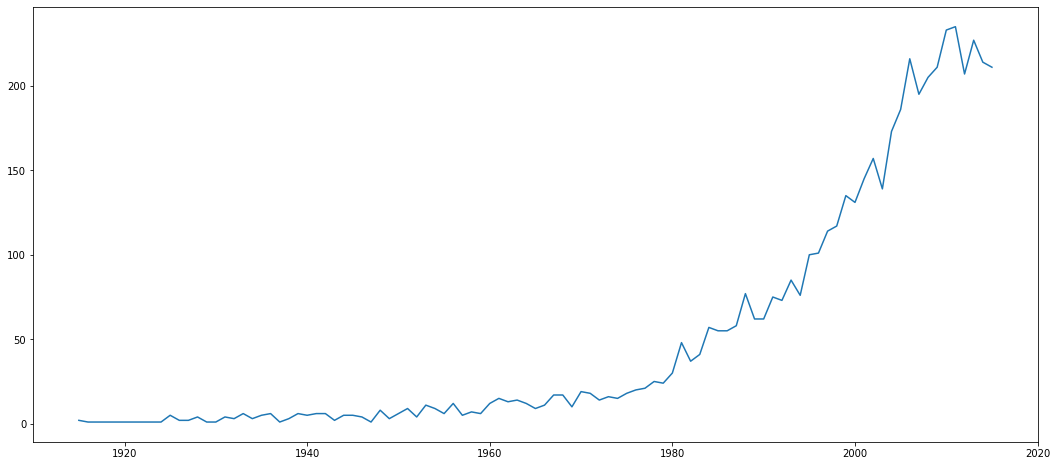

In [36]:
metadata.year.value_counts().sort_index().plot(figsize=(18,8))

In [37]:
metadata[metadata['vote_count'].notnull()][['title','revenue', 'year','vote_count']].sort_values('vote_count', ascending=False).head(10)

,title,revenue,year,vote_count
3601,Inception,8.255328e+08,2010.0,14075.0
3138,The Dark Knight,1.004558e+09,2008.0,12269.0
3488,Avatar,2.787965e+09,2009.0,12114.0
3875,The Avengers,1.519558e+09,2012.0,12000.0
4405,Interstellar,6.751200e+08,2014.0,11187.0
4149,Django Unchained,4.253682e+08,2012.0,10297.0
4487,Guardians of the Galaxy,7.733286e+08,2014.0,10014.0
1080,Fight Club,1.008538e+08,1999.0,9678.0
3943,The Hunger Games,6.912107e+08,2012.0,9634.0
4626,Mad Max: Fury Road,3.788583e+08,2015.0,9629.0


In [38]:
metadata[metadata['vote_count'] > 3000][['title','revenue', 'year','vote_average']].sort_values('vote_average', ascending=False).head(10)

,title,revenue,year,vote_average
121,The Shawshank Redemption,28341469.0,1994.0,8.5
277,The Godfather,245066411.0,1972.0,8.5
392,One Flew Over the Cuckoo's Nest,108981275.0,1975.0,8.3
4480,Whiplash,13092000.0,2014.0,8.3
832,Life Is Beautiful,229400000.0,1997.0,8.3
1080,Fight Club,100853753.0,1999.0,8.3
112,Pulp Fiction,213928762.0,1994.0,8.3
411,The Godfather: Part II,47542841.0,1974.0,8.3
1859,Spirited Away,274925095.0,2001.0,8.3
196,Schindler's List,321365567.0,1993.0,8.3


In [39]:
metadata[metadata['revenue'].notnull()][['title', 'budget', 'revenue', 'year']].sort_values('revenue', ascending=False).head(10)

,title,budget,revenue,year
3488,Avatar,237000000.0,2.787965e+09,2009.0
4628,Star Wars: The Force Awakens,245000000.0,2.068224e+09,2015.0
589,Titanic,200000000.0,1.845034e+09,1997.0
3875,The Avengers,220000000.0,1.519558e+09,2012.0
4572,Jurassic World,150000000.0,1.513529e+09,2015.0
4686,Furious 7,190000000.0,1.506249e+09,2015.0
4629,Avengers: Age of Ultron,280000000.0,1.405404e+09,2015.0
3827,Harry Potter and the Deathly Hallows: Part 2,125000000.0,1.342000e+09,2011.0
4345,Frozen,150000000.0,1.274219e+09,2013.0
4221,Iron Man 3,200000000.0,1.215440e+09,2013.0


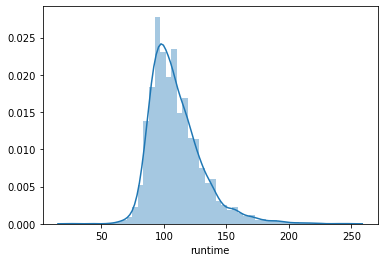

In [40]:
sns.distplot(metadata[(metadata['runtime'] < 300) & (metadata['runtime'] > 0)]['runtime'])

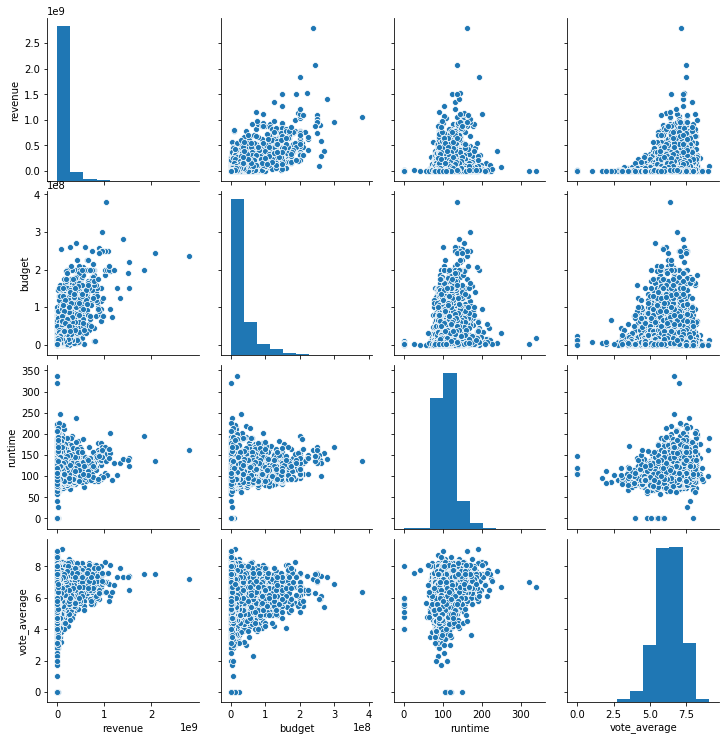

In [41]:
sns.pairplot(metadata, vars = ['revenue', 'budget', 'runtime', 'vote_average'])

Found a dataset that includes movies up until 2020, so I built a test set of the movies from 2017-2020. Can download that here:
https://www.kaggle.com/ritayandhara/tmdb-dataset and use the 10000 Popular Movies dataset

In [42]:
test = pd.read_csv('tmdb-dataset/TMDB_10000_Popular_Movies.csv')
test.head()

,TMDb_Id,IMDb_Id,Title,Original_Title,Overview,Genres,Cast,Crew,Collection,Release_Date,...,Languages_Spoken,Runtime,Tagline,Popularity,Rating_average,Rating_Count,Production_Companies,Country_of_Origin,Budget,Revenue
0,419704,tt2935510,Ad Astra,Ad Astra,"The near future, a time when both hope and har...",Drama | Science Fiction,Brad Pitt | Tommy Lee Jones | Ruth Negga | Joh...,Brad Pitt | Arnon Milchan | Gary Rydstrom | Ga...,Single,2019-09-17,...,English | Norsk,123.0,The answers we seek are just outside our reach,463.487,5.9,2863,New Regency Productions | Keep Your Head | Mad...,Brazil | China | United States of America,87500000.0,127175922.0
1,338762,tt1634106,Bloodshot,Bloodshot,"After he and his wife are murdered, marine Ray...",Action | Science Fiction,Vin Diesel | Eiza González | Sam Heughan | Tob...,John Papsidera | Matthew Vaughn | Jim May | Ne...,Single,2020-03-05,...,English,110.0,Being a superhero is in his blood,235.701,7.2,1384,Sony Pictures | Cross Creek Pictures | Mimran ...,China | United States of America,42000000.0,24573617.0
2,38700,tt1502397,Bad Boys for Life,Bad Boys for Life,Marcus and Mike are forced to confront new thr...,Action | Crime | Thriller,Will Smith | Martin Lawrence | Paola Nuñez | V...,Jerry Bruckheimer | Mike Stenson | Chad Oman |...,Bad Boys Collection,2020-01-15,...,Español | English,124.0,Ride together. Die together.,255.068,7.1,2596,Columbia Pictures | Platinum Dunes | 2.0 Enter...,France | United States of America,0.0,191150000.0
3,102899,tt0478970,Ant-Man,Ant-Man,Armed with the astonishing ability to shrink i...,Action | Adventure | Science Fiction,Paul Rudd | Michael Douglas | Evangeline Lilly...,David Lazan | Jackie Burch | Sala Baker | Sala...,Ant-Man Collection,2015-07-14,...,English,117.0,Heroes don't get any bigger.,134.294,7.1,13625,Marvel Studios,United States of America,130000000.0,519311965.0
4,76285,tt1854564,Percy Jackson: Sea of Monsters,Percy Jackson: Sea of Monsters,"In their quest to confront the ultimate evil, ...",Adventure | Fantasy | Family,Logan Lerman | Alexandra Daddario | Douglas Sm...,Mark Goldblatt | Shelly Johnson | Karen Rosenf...,Percy Jackson Collection,2013-08-07,...,English,106.0,"Where There Are Gods, There Are Monsters.",124.417,5.9,3547,Fox 2000 Pictures | Sunswept Entertainment | 1...,United States of America,90000000.0,199850315.0


In [43]:
test['Release_Date'] = pd.to_datetime(test['Release_Date'], errors= 'coerce')
test['Year'] = test['Release_Date'].apply(lambda x: x.year if x != np.nan else np.nan)
test['Month'] = test['Release_Date'].apply(lambda x: x.month if x != np.nan else np.nan)
test['Day'] = test['Release_Date'].apply(lambda x: x.day if x != np.nan else np.nan)
test['Day_Name'] = test['Release_Date'].apply(lambda x: x.day_name() if x != np.nan else np.nan)
test['Rating_Count'] = test['Rating_Count'].astype('float')

In [44]:
test = test[test['Year'] > 2015]
test = test.reset_index(drop = True)

In [45]:
test = test.drop('TMDb_Id', axis = 1)
test = test.drop('IMDb_Id', axis = 1)
test = test.drop('Original_Title', axis = 1)
test = test.drop('Overview', axis = 1)
test = test.drop('Cast', axis = 1)
test = test.drop('Crew', axis = 1)
test = test.drop('Collection', axis = 1)
test = test.drop('Release_Date', axis = 1)
test = test.drop('Release_Status', axis = 1)
test = test.drop('Languages_Spoken', axis = 1)
test = test.drop('Tagline', axis = 1)
test = test.drop('Production_Companies', axis = 1)
test = test.drop('Country_of_Origin', axis = 1)
test = test.drop('Original_Language', axis = 1)

In [46]:
test = test[['Budget',
 'Popularity',
 'Revenue',
 'Runtime',
 'Title',
 'Rating_average',
 'Rating_Count',
 'Genres',
 'Year',
 'Month',
 'Day',
 'Day_Name']]

In [47]:
test.drop(test[test['Genres'].isnull()].index, inplace = True)
test = test.reset_index(drop = True)
test.head()

,Budget,Popularity,Revenue,Runtime,Title,Rating_average,Rating_Count,Genres,Year,Month,Day,Day_Name
0,87500000.0,463.487,127175922.0,123.0,Ad Astra,5.9,2863.0,Drama | Science Fiction,2019.0,9.0,17.0,Tuesday
1,42000000.0,235.701,24573617.0,110.0,Bloodshot,7.2,1384.0,Action | Science Fiction,2020.0,3.0,5.0,Thursday
2,0.0,255.068,191150000.0,124.0,Bad Boys for Life,7.1,2596.0,Action | Crime | Thriller,2020.0,1.0,15.0,Wednesday
3,75000000.0,192.582,199158461.0,109.0,Birds of Prey (and the Fantabulous Emancipatio...,7.1,2681.0,Action | Comedy | Crime,2020.0,2.0,5.0,Wednesday
4,2700000.0,97.705,0.0,91.0,Cold Blood,5.1,123.0,Action | Thriller,2019.0,5.0,15.0,Wednesday


In [48]:
test = test.rename(columns= {'Budget': 'budget', 'Popularity': 'popularity', 'Revenue': 'revenue', 'Runtime': 'runtime', 'Title': 'title', 'Rating_average': 'vote_average', 'Rating_Count': 'vote_count', 'Genres': 'genres', 'Year': 'year', 'Month': 'month', 'Day': 'day', 'Day_Name': 'day_name'})

In [49]:
test['day'] = test['day'].astype('int')
test['month'] = test['month'].astype('int')

In [50]:
test = pd.concat([test,pd.get_dummies(test['day'], prefix='day')], axis=1).drop(['day'],axis=1)
test = pd.concat([test,pd.get_dummies(test['month'], prefix='month')], axis=1).drop(['month'],axis=1)
test = pd.concat([test,pd.get_dummies(test['day_name'], prefix='day_name')], axis=1).drop(['day_name'],axis=1)

In [51]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2367 entries, 0 to 2366
Data columns (total 59 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   budget              2367 non-null   float64
 1   popularity          2367 non-null   float64
 2   revenue             2367 non-null   float64
 3   runtime             2359 non-null   float64
 4   title               2367 non-null   object 
 5   vote_average        2367 non-null   float64
 6   vote_count          2367 non-null   float64
 7   genres              2367 non-null   object 
 8   year                2367 non-null   float64
 9   day_1               2367 non-null   uint8  
 10  day_2               2367 non-null   uint8  
 11  day_3               2367 non-null   uint8  
 12  day_4               2367 non-null   uint8  
 13  day_5               2367 non-null   uint8  
 14  day_6               2367 non-null   uint8  
 15  day_7               2367 non-null   uint8  
 16  day_8 

In [52]:
def extract_test_genres(x):
    genres = x['genres']
    #print(genres)
    item2 = list(genres.split(' | '))
    #print(item2)
    return item2
        

In [53]:
test['genres'] = test.apply(extract_test_genres, axis = 1)

mlb_test = MultiLabelBinarizer()
test = test.join(pd.DataFrame(mlb_test.fit_transform(test['genres']), columns = mlb_test.classes_, index = test['genres'].index))

test = test.drop('genres', axis = 1)
test.head()

,budget,popularity,revenue,runtime,title,vote_average,vote_count,year,day_1,day_2,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,87500000.0,463.487,127175922.0,123.0,Ad Astra,5.9,2863.0,2019.0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,42000000.0,235.701,24573617.0,110.0,Bloodshot,7.2,1384.0,2020.0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.0,255.068,191150000.0,124.0,Bad Boys for Life,7.1,2596.0,2020.0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,75000000.0,192.582,199158461.0,109.0,Birds of Prey (and the Fantabulous Emancipatio...,7.1,2681.0,2020.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2700000.0,97.705,0.0,91.0,Cold Blood,5.1,123.0,2019.0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [54]:
test['budget'] = test['budget'].replace(0, np.nan)
test['revenue'] = test['revenue'].replace(0, np.nan)
test.drop(test[test['budget'].isnull()].index, inplace = True)
test = test.reset_index(drop = True)
test.drop(test[test['revenue'].isnull()].index, inplace = True)
test = test.reset_index(drop = True)

In [55]:
test.info()
test[test['revenue'] == 0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 77 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   budget              658 non-null    float64
 1   popularity          658 non-null    float64
 2   revenue             658 non-null    float64
 3   runtime             658 non-null    float64
 4   title               658 non-null    object 
 5   vote_average        658 non-null    float64
 6   vote_count          658 non-null    float64
 7   year                658 non-null    float64
 8   day_1               658 non-null    uint8  
 9   day_2               658 non-null    uint8  
 10  day_3               658 non-null    uint8  
 11  day_4               658 non-null    uint8  
 12  day_5               658 non-null    uint8  
 13  day_6               658 non-null    uint8  
 14  day_7               658 non-null    uint8  
 15  day_8               658 non-null    uint8  
 16  day_9   

,budget,popularity,revenue,runtime,title,vote_average,vote_count,year,day_1,day_2,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western


In [56]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5042 entries, 0 to 5041
Data columns (total 77 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   budget              5042 non-null   float64
 1   popularity          5042 non-null   float64
 2   revenue             5042 non-null   float64
 3   runtime             5041 non-null   float64
 4   title               5042 non-null   object 
 5   vote_average        5042 non-null   float64
 6   vote_count          5042 non-null   float64
 7   year                5042 non-null   float64
 8   day_1               5042 non-null   uint8  
 9   day_2               5042 non-null   uint8  
 10  day_3               5042 non-null   uint8  
 11  day_4               5042 non-null   uint8  
 12  day_5               5042 non-null   uint8  
 13  day_6               5042 non-null   uint8  
 14  day_7               5042 non-null   uint8  
 15  day_8               5042 non-null   uint8  
 16  day_9 

One hot encode big-name actors/cast members One hot encode genres

Compare movie's revenue to other movies from that genre/year/other features

Show residuals on top of just rsme for better understandability (Show what % off we were)

Create test dataset out of 2018/19 movies

In [57]:
metadata.to_csv('train.csv', index=False)
test.to_csv('test.csv', index = False)